In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



# Read VAV AHU Points from CSV files

In [2]:
vav_dprs = pd.read_csv('./All Air Damper Positions-data-as-seriestocolumns-2021-11-05 12_02_42.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
vav_htg_vlvs = pd.read_csv('./All Reheat Valve Positions-data-as-seriestocolumns-2021-11-05 12_27_13.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
vav_total_air = pd.read_csv('./Total VAV Box Air Flow-data-2021-11-05 12_06_37.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
rtu_cooling_sig = pd.read_csv('./RTU Cooling Compressor Commands-data-2021-11-05 12_05_40.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
rtu_duct_pressure = pd.read_csv('./RTU Duct Static Pressure-data-as-seriestocolumns-2021-11-06 07_21_53.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
rtu_fan_speed = pd.read_csv('./RTU Supply Fan Speed-data-2021-11-05 12_06_04.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
rtu_temps = pd.read_csv('./RTU Temperatures-data-as-seriestocolumns-2021-11-05 12_04_38.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()
rtu_economizer = pd.read_csv('./RTU Economizer-data-as-seriestocolumns-2021-11-05 12_05_18.csv', index_col='Time', parse_dates=True).fillna(method='ffill').dropna()

# VAV Box Air Damper Positions

In [3]:
print(vav_dprs.columns)

Index(['slipstream_internal/slipstream_hq/10/DPR-O',
       'slipstream_internal/slipstream_hq/23/DPR-O',
       'slipstream_internal/slipstream_hq/11/DPR-O',
       'slipstream_internal/slipstream_hq/13/DPR-O',
       'slipstream_internal/slipstream_hq/24/DPR-O',
       'slipstream_internal/slipstream_hq/14/DPR-O',
       'slipstream_internal/slipstream_hq/25/DPR-O',
       'slipstream_internal/slipstream_hq/15/DPR-O',
       'slipstream_internal/slipstream_hq/16/DPR-O',
       'slipstream_internal/slipstream_hq/19/DPR-O',
       'slipstream_internal/slipstream_hq/20/DPR-O',
       'slipstream_internal/slipstream_hq/26/DPR-O',
       'slipstream_internal/slipstream_hq/21/DPR-O',
       'slipstream_internal/slipstream_hq/27/DPR-O',
       'slipstream_internal/slipstream_hq/7/DPR-O',
       'slipstream_internal/slipstream_hq/29/DPR-O',
       'slipstream_internal/slipstream_hq/30/DPR-O',
       'slipstream_internal/slipstream_hq/31/DPR-O',
       'slipstream_internal/slipstream_hq/8/DPR

# VAV Box Reheat Valve Positions

In [4]:
print(vav_htg_vlvs.columns)

Index(['slipstream_internal/slipstream_hq/10/HTG-O',
       'slipstream_internal/slipstream_hq/23/HTG-O',
       'slipstream_internal/slipstream_hq/11/HTG-O',
       'slipstream_internal/slipstream_hq/13/HTG-O',
       'slipstream_internal/slipstream_hq/24/HTG-O',
       'slipstream_internal/slipstream_hq/14/HTG-O',
       'slipstream_internal/slipstream_hq/25/HTG-O',
       'slipstream_internal/slipstream_hq/15/HTG-O',
       'slipstream_internal/slipstream_hq/16/HTG-O',
       'slipstream_internal/slipstream_hq/19/HTG-O',
       'slipstream_internal/slipstream_hq/20/HTG-O',
       'slipstream_internal/slipstream_hq/26/HTG-O',
       'slipstream_internal/slipstream_hq/21/HTG-O',
       'slipstream_internal/slipstream_hq/27/HTG-O',
       'slipstream_internal/slipstream_hq/7/HTG-O',
       'slipstream_internal/slipstream_hq/29/HTG-O',
       'slipstream_internal/slipstream_hq/30/HTG-O',
       'slipstream_internal/slipstream_hq/31/HTG-O',
       'slipstream_internal/slipstream_hq/8/HTG

# Calculated Total Air Flow From VAV Boxes in SQL prior to Pandas

In [5]:
print(vav_total_air.columns)

Index(['Total Air Flow'], dtype='object')


# RTU DX Cooling Signal (stages compressors)

In [6]:
print(rtu_cooling_sig.columns)

Index(['slipstream_internal/slipstream_hq/1100/Cooling Capacity Status'], dtype='object')


# RTU Duct Static Pressure

In [7]:
print(rtu_duct_pressure.columns)

Index(['slipstream_internal/slipstream_hq/1100/Duct Static Pressure Local', 'slipstream_internal/slipstream_hq/1100/Duct Static Pressure Setpoint Active'], dtype='object')


# RTU Fan Speed % VFD Speed

In [8]:
print(rtu_fan_speed.columns)

Index(['slipstream_internal/slipstream_hq/1100/Supply Fan Speed Command'], dtype='object')


# RTU Economizer Points

In [9]:
print(rtu_economizer.columns)


Index(['slipstream_internal/slipstream_hq/1100/Outdoor Air Enthalpy Active',
       'slipstream_internal/slipstream_hq/1100/Outdoor Air Relative Humidity Local',
       'slipstream_internal/slipstream_hq/1100/Return Air Temperature',
       'slipstream_internal/slipstream_hq/1100/Return Air Enthalpy Active',
       'slipstream_internal/slipstream_hq/1002/Outside Air Temperature local',
       'slipstream_internal/slipstream_hq/1100/Outdoor Air Damper Command',
       'slipstream_internal/slipstream_hq/1100/Return Air Humidity Local'],
      dtype='object')


# RTU Temps

In [10]:
print(rtu_temps.columns)

Index(['slipstream_internal/slipstream_hq/1100/Discharge Air Temperature',
       'slipstream_internal/slipstream_hq/1100/Mixed Air Temperature Local',
       'slipstream_internal/slipstream_hq/1100/Return Air Temperature',
       'slipstream_internal/slipstream_hq/1100/Discharge Air Cooling Setpoint BAS',
       'slipstream_internal/slipstream_hq/1002/Outside Air Temperature local'],
      dtype='object')


# Compute 5 Min Rolling Avg Per G36 Spec

In [11]:
vav_dprs_avg = vav_dprs.rolling('5T').mean()
vav_htg_vlvs_avg = vav_htg_vlvs.rolling('5T').mean()
vav_total_air_avg = vav_total_air.rolling('5T').mean()
rtu_cooling_sig_avg = rtu_cooling_sig.rolling('5T').mean()
rtu_duct_pressure_avg = rtu_duct_pressure.rolling('5T').mean()
rtu_fan_speed_avg = rtu_fan_speed.rolling('5T').mean()
rtu_temps_avg = rtu_temps.rolling('5T').mean()
rtu_economizer_avg = rtu_economizer.rolling('5T').mean()

<AxesSubplot:title={'center':'RTU TEMPS'}, xlabel='Time'>

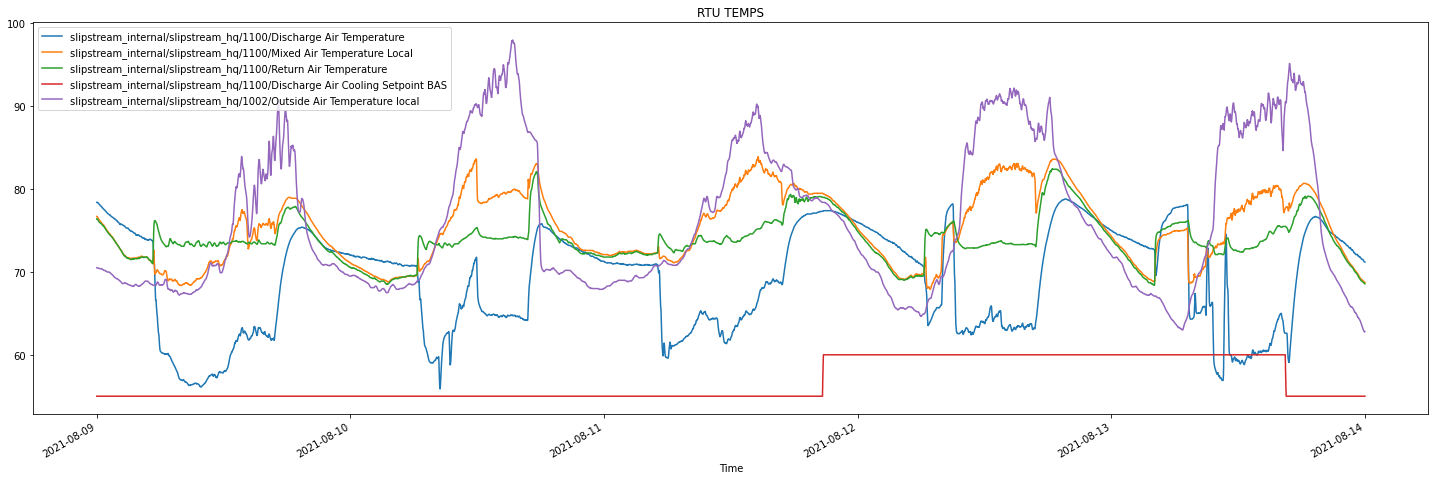

In [12]:
rtu_temps_avg.plot(figsize=(25,8), title='RTU TEMPS')

# Internal VAV AHU AFDD Variables per G36 Spec Imperial Units

In [13]:
supply_fan_delta_degf = 2
oat_rat_delta_degf_min = 10
supply_degf_err_thres = 2
return_degf_err_thres = 2
mix_degf_err_thres = 5
outdoor_degf_err_thres = 5
air_flow_percent_thres = .3
vfd_speed_percent_err_thres = .05
vfd_speed_percent_max = .99
duct_static_inches_err_thres = .1
delta_os_max = 7
mode_delay = 30
alarm_dely = 30
test_mode_delay = 120 

In [14]:
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# FAULT CONDITION 1 SCENORIO, COMPARE THE AHU FAN AND DUCT PRESSURE

In [15]:
'''
def fault_condition_one(dataframe):
    return (dataframe.duct_static < (dataframe.duct_static_setpoint-dataframe.duct_static_inches_err_thres)).any() & (dataframe.vfd_speed >= (dataframe.vfd_speed_percent_max-dataframe.vfd_speed_percent_err_thres)).any()
'''


'\ndef fault_condition_one(dataframe):\n    return (dataframe.duct_static < (dataframe.duct_static_setpoint-dataframe.duct_static_inches_err_thres)).any() & (dataframe.vfd_speed >= (dataframe.vfd_speed_percent_max-dataframe.vfd_speed_percent_err_thres)).any()\n'

In [16]:
import operator

def fault_condition_one(dataframe):
    #return dataframe.iterrows(operator.and_(dataframe.duct_static < (dataframe.duct_static_setpoint-dataframe.duct_static_inches_err_thres)),(dataframe.vfd_speed >= (dataframe.vfd_speed_percent_max-dataframe.vfd_speed_percent_err_thres)))
    return operator.and_(dataframe.duct_static < dataframe.duct_static_setpoint, dataframe.vfd_speed >= dataframe.vfd_speed_percent_max)


In [17]:
# return (dataframe.duct_static < (dataframe.duct_static_setpoint-dataframe.duct_static_inches_err_thres)).any() & (dataframe.vfd_speed >= (dataframe.vfd_speed_percent_max-dataframe.vfd_speed_percent_err_thres)).any()


In [18]:
# combine duct pressure and fan speed datasets

fc1_dataset = rtu_duct_pressure_avg.join(rtu_fan_speed_avg)

In [19]:
# make an entire column out of these params
fc1_dataset['vfd_speed_percent_err_thres'] = vfd_speed_percent_err_thres
fc1_dataset['duct_static_inches_err_thres'] = duct_static_inches_err_thres
fc1_dataset['vfd_speed_percent_max'] = vfd_speed_percent_max

In [20]:
fc1_dataset.columns

Index(['slipstream_internal/slipstream_hq/1100/Duct Static Pressure Local',
       'slipstream_internal/slipstream_hq/1100/Duct Static Pressure Setpoint Active',
       'slipstream_internal/slipstream_hq/1100/Supply Fan Speed Command',
       'vfd_speed_percent_err_thres', 'duct_static_inches_err_thres',
       'vfd_speed_percent_max'],
      dtype='object')

In [21]:
fc1_dataset.rename(columns={'slipstream_internal/slipstream_hq/1100/Duct Static Pressure Local': 'duct_static', 
                   'slipstream_internal/slipstream_hq/1100/Duct Static Pressure Setpoint Active': 'duct_static_setpoint',
                   'slipstream_internal/slipstream_hq/1100/Supply Fan Speed Command': 'vfd_speed'}, inplace=True)

In [22]:
fc1_dataset['fc1_flag'] = fault_condition_one(fc1_dataset)

In [23]:
fc1_dataset.head()

,duct_static,duct_static_setpoint,vfd_speed,vfd_speed_percent_err_thres,duct_static_inches_err_thres,vfd_speed_percent_max,fc1_flag
Time,,,,,,,
2021-08-09 00:00:01,0.03250,0.75,0.0,0.05,0.1,0.99,False
2021-08-09 00:01:01,0.03260,0.75,0.0,0.05,0.1,0.99,False
2021-08-09 00:02:01,0.03270,0.75,0.0,0.05,0.1,0.99,False
2021-08-09 00:03:01,0.03265,0.75,0.0,0.05,0.1,0.99,False
2021-08-09 00:04:01,0.03274,0.75,0.0,0.05,0.1,0.99,False


In [24]:
fc1_dataset['fc1_flag'].value_counts()

False    5025
True     2169
Name: fc1_flag, dtype: int64

In [25]:
# change boolean column to int for plots

fc1_dataset['fc1_flag'] = fc1_dataset['fc1_flag'].astype(int)

# drop params column for better plot
fc1_dataset = fc1_dataset.drop(['vfd_speed_percent_err_thres',
                  'duct_static_inches_err_thres',
                  'vfd_speed_percent_max'],axis=1)


<AxesSubplot:title={'center':'FC 1 Test'}, xlabel='Time'>

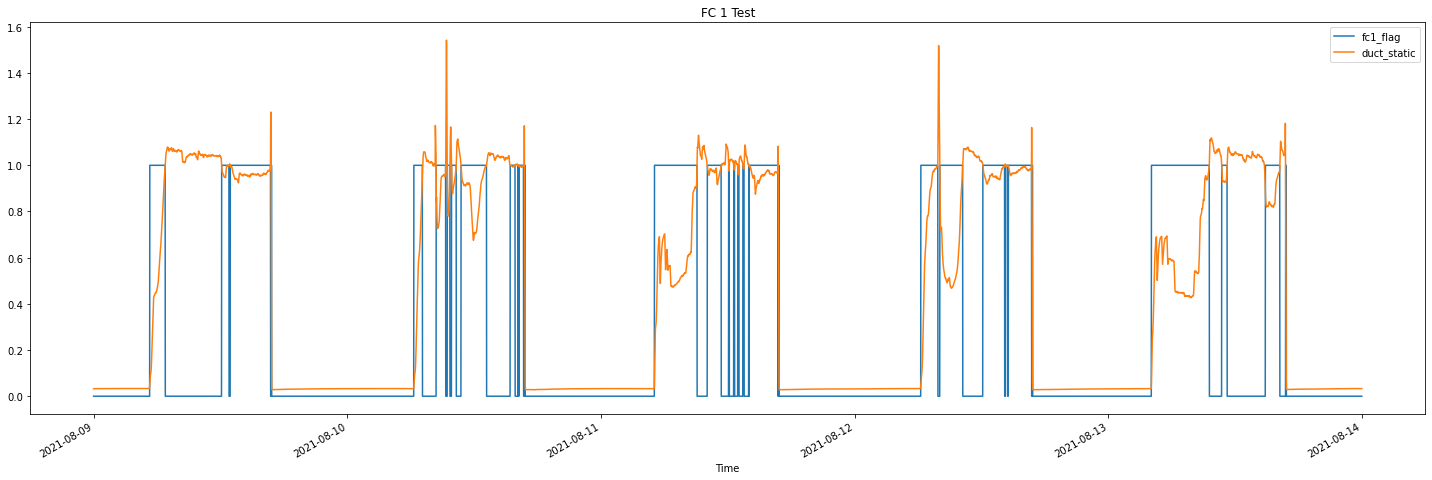

In [26]:
fdd_plot = fc1_dataset[['fc1_flag','duct_static']]

fdd_plot.plot(figsize=(25,8),title='FC 1 Test')

In [27]:
# https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes